<h2>World Happiness Reports 2015-2017</h2>

<h4>Data Cleaning with pandas (missing and duplicate values)</h4>

In [1]:
#using dataset from Kaggle: https://www.kaggle.com/unsdsn/world-happiness#2015.csv

import pandas as pd
import numpy as np
import seaborn as sns

happiness2015 = pd.read_csv("wh_2015.csv")
happiness2016 = pd.read_csv("wh_2016.csv")
happiness2017 = pd.read_csv("wh_2017.csv")

shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape 
shape_2017 = happiness2017.shape

print(shape_2015, shape_2016, shape_2017)

(164, 13) (164, 14) (164, 13)


In [2]:
missing_2015 = happiness2015.isnull().sum()
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()

print(missing_2015)
print(missing_2016)
print(missing_2017)

#The result is a series in which:
#- The index contains the names of the columns in happiness2015/happiness2016/happiness2017.
#- The corresponding value is the number of null values in each column.

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64
Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64
Country                      

In [3]:
#previous cell shows that the names differ, so fix column names
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

missing = combined.isnull().sum()
print(missing)

COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64


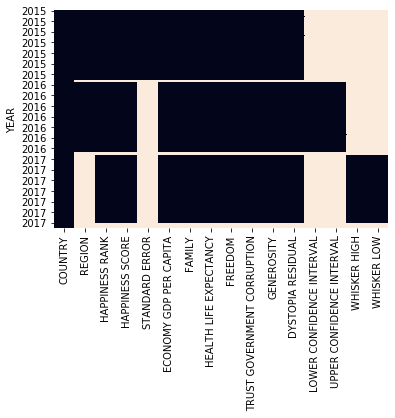

In [4]:
#create a heatmap to see where the missing values are
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

#conclusion: COUNTRY seems to be the only column without missing values, REGION has missing value in 2017

In [5]:
#Confirm that the REGION column is missing from the 2017 data
regions_2017 = combined[combined["YEAR"] == 2017]["REGION"]

missing = regions_2017.isnull().sum()
print(missing)

164


In [6]:
#Dataframe with all the Countries and Regions according to happiness2015 and happiness
regions_15 = happiness2015.loc[:, ["COUNTRY", "REGION"]]
regions_16 = happiness2016.loc[:, ["COUNTRY", "REGION"]]

regions_15.dropna(inplace=True)
regions_16.dropna(inplace=True)

total_regions = pd.concat([regions_15, regions_16], ignore_index=True)
total_regions = total_regions.drop_duplicates(subset = "COUNTRY")

print(total_regions)

               COUNTRY                       REGION
0          Switzerland               Western Europe
1              Iceland               Western Europe
2              Denmark               Western Europe
3               Norway               Western Europe
4               Canada                North America
..                 ...                          ...
209             Belize  Latin America and Caribbean
233            Somalia           Sub-Saharan Africa
254  Somaliland Region           Sub-Saharan Africa
270            Namibia           Sub-Saharan Africa
300        South Sudan           Sub-Saharan Africa

[164 rows x 2 columns]


In [7]:
#Assign the REGION in the regions dataframe to the corresponding country in combined
combined = pd.merge(left=combined, right=total_regions, on="COUNTRY", how="left")

#Drop the original region column with missing values, now named REGION_x
combined = combined.drop("REGION_x", axis = 1)
combined = combined.rename(columns={"REGION_y": "REGION"})

#Check for missing values
missing = combined.isnull().sum()

print(missing)

COUNTRY                          0
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
REGION                           0
dtype: int64


In [8]:
#Check for dublicate countries within each year (uppercase first to standardize the capitalization)
combined["COUNTRY"] = combined["COUNTRY"].str.upper()
dups = combined.duplicated(["COUNTRY", "YEAR"])

print(combined[dups])

               COUNTRY  HAPPINESS RANK  HAPPINESS SCORE  STANDARD ERROR  \
162  SOMALILAND REGION             NaN              NaN             NaN   
326  SOMALILAND REGION             NaN              NaN             NaN   
489  SOMALILAND REGION             NaN              NaN             NaN   

     ECONOMY GDP PER CAPITA  FAMILY  HEALTH LIFE EXPECTANCY  FREEDOM  \
162                     NaN     NaN                     NaN      NaN   
326                     NaN     NaN                     NaN      NaN   
489                     NaN     NaN                     NaN      NaN   

     TRUST GOVERNMENT CORRUPTION  GENEROSITY  DYSTOPIA RESIDUAL  YEAR  \
162                          NaN         NaN                NaN  2015   
326                          NaN         NaN                NaN  2016   
489                          NaN         NaN                NaN  2017   

     LOWER CONFIDENCE INTERVAL  UPPER CONFIDENCE INTERVAL  WHISKER HIGH  \
162                        NaN            

In [9]:
#Inspect duplicates
print(combined[combined['COUNTRY'] == 'SOMALILAND REGION'])

               COUNTRY  HAPPINESS RANK  HAPPINESS SCORE  STANDARD ERROR  \
90   SOMALILAND REGION            91.0            5.057         0.06161   
162  SOMALILAND REGION             NaN              NaN             NaN   
260  SOMALILAND REGION            97.0            5.057             NaN   
326  SOMALILAND REGION             NaN              NaN             NaN   
488  SOMALILAND REGION             NaN              NaN             NaN   
489  SOMALILAND REGION             NaN              NaN             NaN   

     ECONOMY GDP PER CAPITA   FAMILY  HEALTH LIFE EXPECTANCY  FREEDOM  \
90                  0.18847  0.95152                 0.43873  0.46582   
162                     NaN      NaN                     NaN      NaN   
260                 0.25558  0.75862                 0.33108  0.39130   
326                     NaN      NaN                     NaN      NaN   
488                     NaN      NaN                     NaN      NaN   
489                     NaN      NaN

In [10]:
#Drop the duplicate rows
combined = combined.drop_duplicates(["COUNTRY", "YEAR"])

#Check if they are dropped
dups = combined.duplicated(["COUNTRY", "YEAR"])
print(combined[dups])

Empty DataFrame
Columns: [COUNTRY, HAPPINESS RANK, HAPPINESS SCORE, STANDARD ERROR, ECONOMY GDP PER CAPITA, FAMILY, HEALTH LIFE EXPECTANCY, FREEDOM, TRUST GOVERNMENT CORRUPTION, GENEROSITY, DYSTOPIA RESIDUAL, YEAR, LOWER CONFIDENCE INTERVAL, UPPER CONFIDENCE INTERVAL, WHISKER HIGH, WHISKER LOW, REGION]
Index: []


In [11]:
missing = combined.isnull().sum()
print(missing)

COUNTRY                          0
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
STANDARD ERROR                 331
ECONOMY GDP PER CAPITA          19
FAMILY                          19
HEALTH LIFE EXPECTANCY          19
FREEDOM                         19
TRUST GOVERNMENT CORRUPTION     19
GENEROSITY                      19
DYSTOPIA RESIDUAL               19
YEAR                             0
LOWER CONFIDENCE INTERVAL      332
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
REGION                           0
dtype: int64


In [12]:
#Drop columns with more than 300 missing values (make up more than half of the total values)
columns_to_drop = ["LOWER CONFIDENCE INTERVAL", "STANDARD ERROR", "UPPER CONFIDENCE INTERVAL", "WHISKER HIGH", "WHISKER LOW"]

combined = combined.drop(columns_to_drop, axis=1)
missing = combined.isnull().sum()
print(missing)

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION                          0
dtype: int64


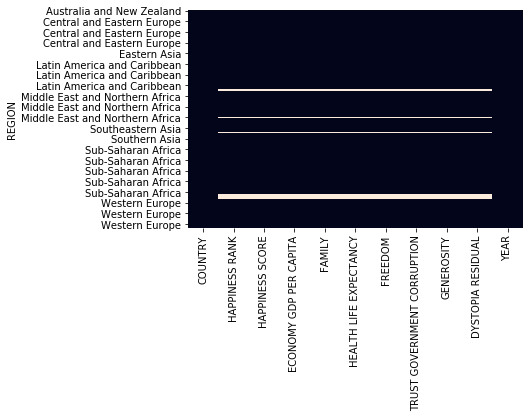

In [13]:
#Will dropping missing values cause us to lose valuable information in other columns?

sorted = combined.set_index("REGION").sort_values(["REGION", "HAPPINESS SCORE"])
sns.heatmap(sorted.isnull(), cbar=False)

#Only three regions contain missing values: Sub-Saharan Africa, Middle East and Northern Africa, Latin America and Carribbean

In [14]:
#Happiness Score per region with NaN values
pv_missing = combined.pivot_table(index="REGION", values="HAPPINESS SCORE", margins=True)
print(pv_missing)

#Happiness Score per region with values with mean
happiness_mean = combined["HAPPINESS SCORE"].mean()

combined["HAPPINESS SCORE UPDATED"] = combined["HAPPINESS SCORE"].fillna(happiness_mean)
pv_mean = combined.pivot_table(index="REGION", values="HAPPINESS SCORE UPDATED", margins=True)
print(pv_mean)

                                 HAPPINESS SCORE
REGION                                          
Australia and New Zealand               7.302500
Central and Eastern Europe              5.371184
Eastern Asia                            5.632333
Latin America and Caribbean             6.069074
Middle East and Northern Africa         5.387879
North America                           7.227167
Southeastern Asia                       5.364077
Southern Asia                           4.590857
Sub-Saharan Africa                      4.150957
Western Europe                          6.693000
All                                     5.370728
                                 HAPPINESS SCORE UPDATED
REGION                                                  
Australia and New Zealand                       7.302500
Central and Eastern Europe                      5.371184
Eastern Asia                                    5.632333
Latin America and Caribbean                     6.030277
Middle East and North

In [15]:
#Because the Happiness Score from the three regions are increased because some values got replaced with the mean
#I think it is better to just not use those rows
combined = combined.dropna()
missing = combined.isnull().sum()

print(missing)

COUNTRY                        0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
HEALTH LIFE EXPECTANCY         0
FREEDOM                        0
TRUST GOVERNMENT CORRUPTION    0
GENEROSITY                     0
DYSTOPIA RESIDUAL              0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64
